In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INITIAL_PROPELANT_WEIGHT = 0.30  #Kg
SAMPLE_RATE = 80
time_constant = 1/SAMPLE_RATE
dataFile = 'june_21_b.csv'

In [3]:
with open(dataFile, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
a = np.array(data)
a = a.astype(float)
filtered = a[np.where(a > 0)]

In [5]:
filtered = np.append(filtered, 0)
filtered = np.insert(filtered, 0, 0)
filtered

array([0.00000000e+00, 1.76580000e-01, 1.36653300e+00, 3.85336800e+00,
       6.75222300e+00, 1.20888630e+01, 1.97926560e+01, 3.22690140e+01,
       5.27522940e+01, 8.46632430e+01, 1.18500876e+02, 1.35200439e+02,
       1.36226565e+02, 1.36359981e+02, 1.37236014e+02, 1.39649274e+02,
       1.40934384e+02, 1.41853581e+02, 1.45241955e+02, 1.47709170e+02,
       1.47429585e+02, 1.46766429e+02, 1.48380174e+02, 1.51028874e+02,
       1.53147834e+02, 1.54116081e+02, 1.55740617e+02, 1.56992373e+02,
       1.59480189e+02, 1.61109630e+02, 1.64817810e+02, 1.64756007e+02,
       1.65927321e+02, 1.69454016e+02, 1.71374814e+02, 1.70041635e+02,
       1.78942248e+02, 1.81696896e+02, 1.86594048e+02, 1.85120586e+02,
       1.83012417e+02, 1.88077320e+02, 1.90756431e+02, 1.95488775e+02,
       1.93392378e+02, 1.98004059e+02, 1.98454338e+02, 2.01889800e+02,
       2.04310908e+02, 2.04638562e+02, 2.05924653e+02, 2.08850976e+02,
       2.14108155e+02, 2.16530244e+02, 2.17635831e+02, 2.20814271e+02,
      

In [6]:
#filtered = np.delete(filtered, [1,2,3,4,10])
burnTime = filtered.size * time_constant

In [7]:
t = np.linspace(0, burnTime, filtered.size)
thrust = filtered

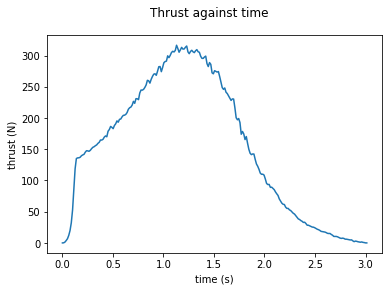

In [8]:
fig = plt.figure()
plt.plot(t, thrust)
fig.suptitle('Thrust against time')
plt.xlabel('time (s)')
plt.ylabel('thrust (N)')
fig.savefig('graph')

In [9]:
#total impulse
#TODO --> Use trapezoidal rule for getting the total impulse
totalImpulse = np.sum(thrust) * time_constant
#specific impulse
specificImpulse = totalImpulse / INITIAL_PROPELANT_WEIGHT
#average thrust
avgThrust = totalImpulse / burnTime

In [10]:
def motorClass(totalImpulse):
    if totalImpulse > 5120:
        return 'M'
    elif totalImpulse > 2560:
        return 'L'
    elif totalImpulse > 1280:
        return 'K'
    elif totalImpulse > 640:
        return 'J'
    elif totalImpulse > 320:
        return 'I'
    elif totalImpulse > 160:
        return 'H'
    elif totalImpulse > 80:
        return 'G'
    elif totalImpulse > 40:
        return 'F'
    elif totalImpulse > 20:
        return 'E'
    elif totalImpulse > 10:
        return 'D'
    elif totalImpulse > 5:
        return 'C'
    elif totalImpulse > 2.5:
        return 'B'
    elif totalImpulse > 1.25:
        return 'A'
    elif totalImpulse > 0.625:
        return '1/2A'
    elif totalImpulse > 0.3126:
        return '1/4A'
    else:
        return 'micro'
    
Class = motorClass(totalImpulse)

In [11]:
st = "Total Impulse:\t\t{:.2f}\tN-sec \nSpecific Impulse:\t{:.2f}\tN-sec/Kg \nAverage Thrust:\t\t{:.2f}\tN"
print(st.format(totalImpulse, specificImpulse, avgThrust))
print("Motor Class:\t\t{}".format(Class))

Total Impulse:		457.15	N-sec 
Specific Impulse:	1523.83	N-sec/Kg 
Average Thrust:		151.75	N
Motor Class:		I


In [12]:
#Generate Rasp File
filename = input("Enter rasp file name")
filename = filename + ".eng"
f = open(filename, "a")

Enter rasp file name june_21


In [13]:
motorName = Class + str(int(avgThrust))
diameter = input("Enter Motor Diameter (mm): ")
Length = input("Input motor Length (mm): ")
delays = input("Input motor delays separated by dashes or P(plugged) for none: ")
pWeight = input("Propellant Weight (Kg): ")
totalWeight = input("Motor Total Weight (Kg): ")
manufucturer = "NKJ"

Enter Motor Diameter (mm):  50
Input motor Length (mm):  200
Input motor delays separated by dashes or P(plugged) for none:  P
Propellant Weight (Kg):  0.6
Motor Total Weight (Kg):  1.2


In [14]:
#Write rasp file header
f.write("; NakujaProject" + motorName + "\n")
f.write("; from " + dataFile + "\n")
f.write("{} {} {} {} {} {} {} \n".format(motorName, diameter, Length, delays, pWeight, totalWeight, manufucturer))

27

In [15]:
thrustATime = np.array([t, thrust]).T
np.savetxt(f, thrustATime, delimiter=' ')

In [16]:
f.close()